# Fig 5 

C:\Users\Admin\AppData\Local\Temp/ipykernel_8380/2300508752.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticksx, fontsize = f)
C:\Users\Admin\AppData\Local\Temp/ipykernel_8380/2300508752.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticksx, fontsize = f)


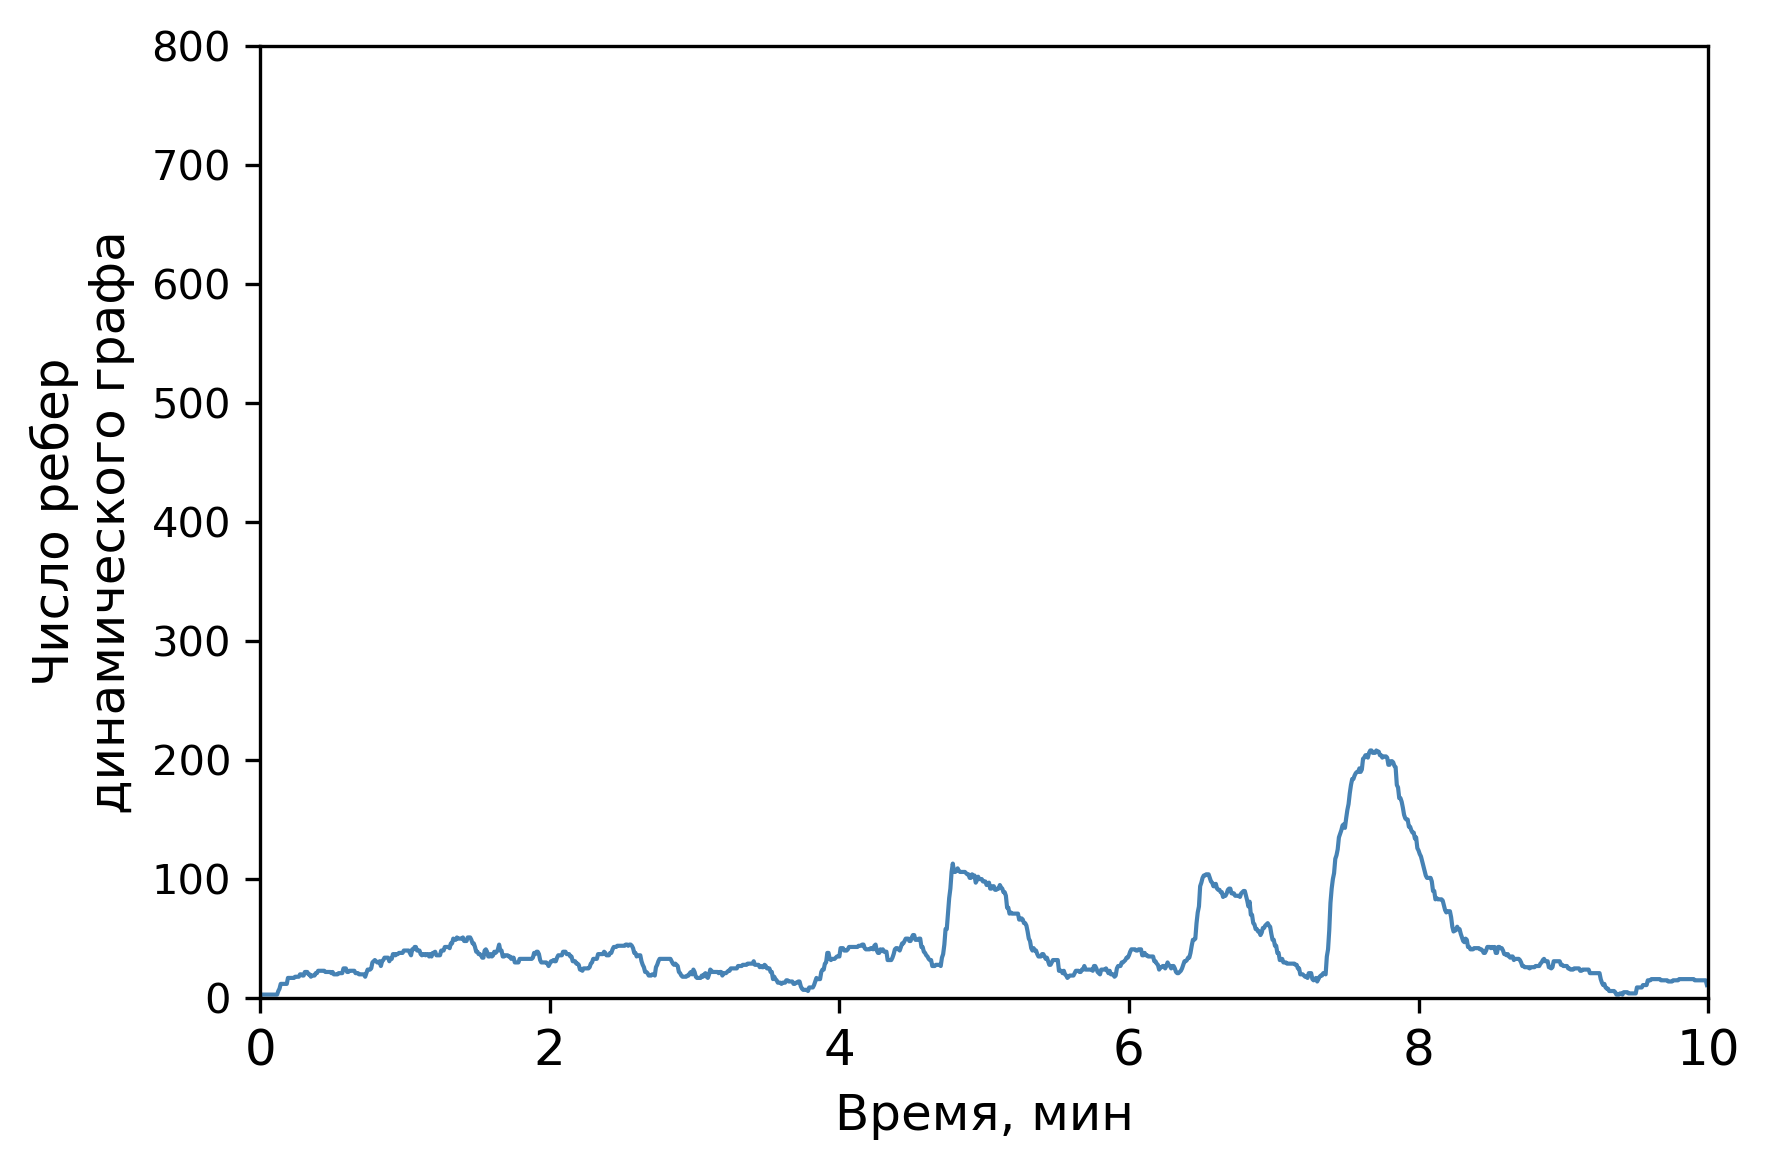

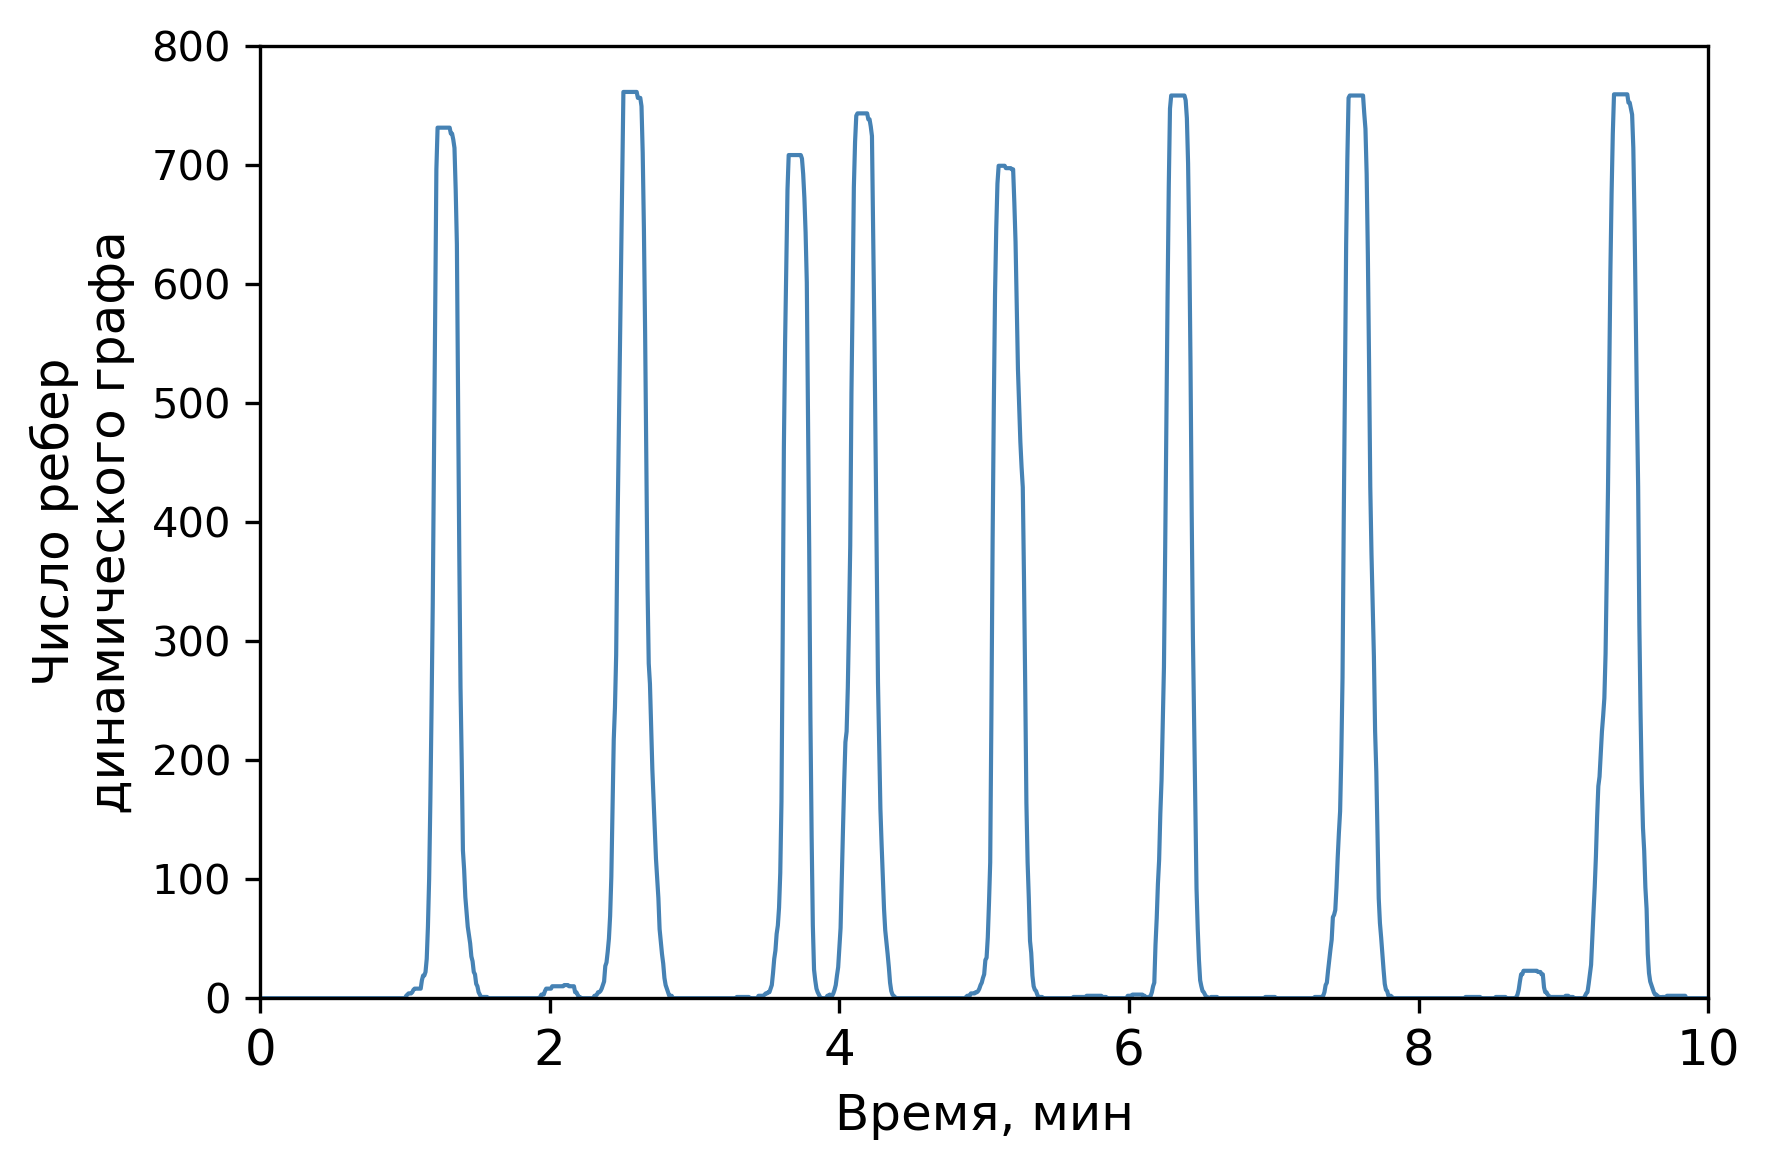

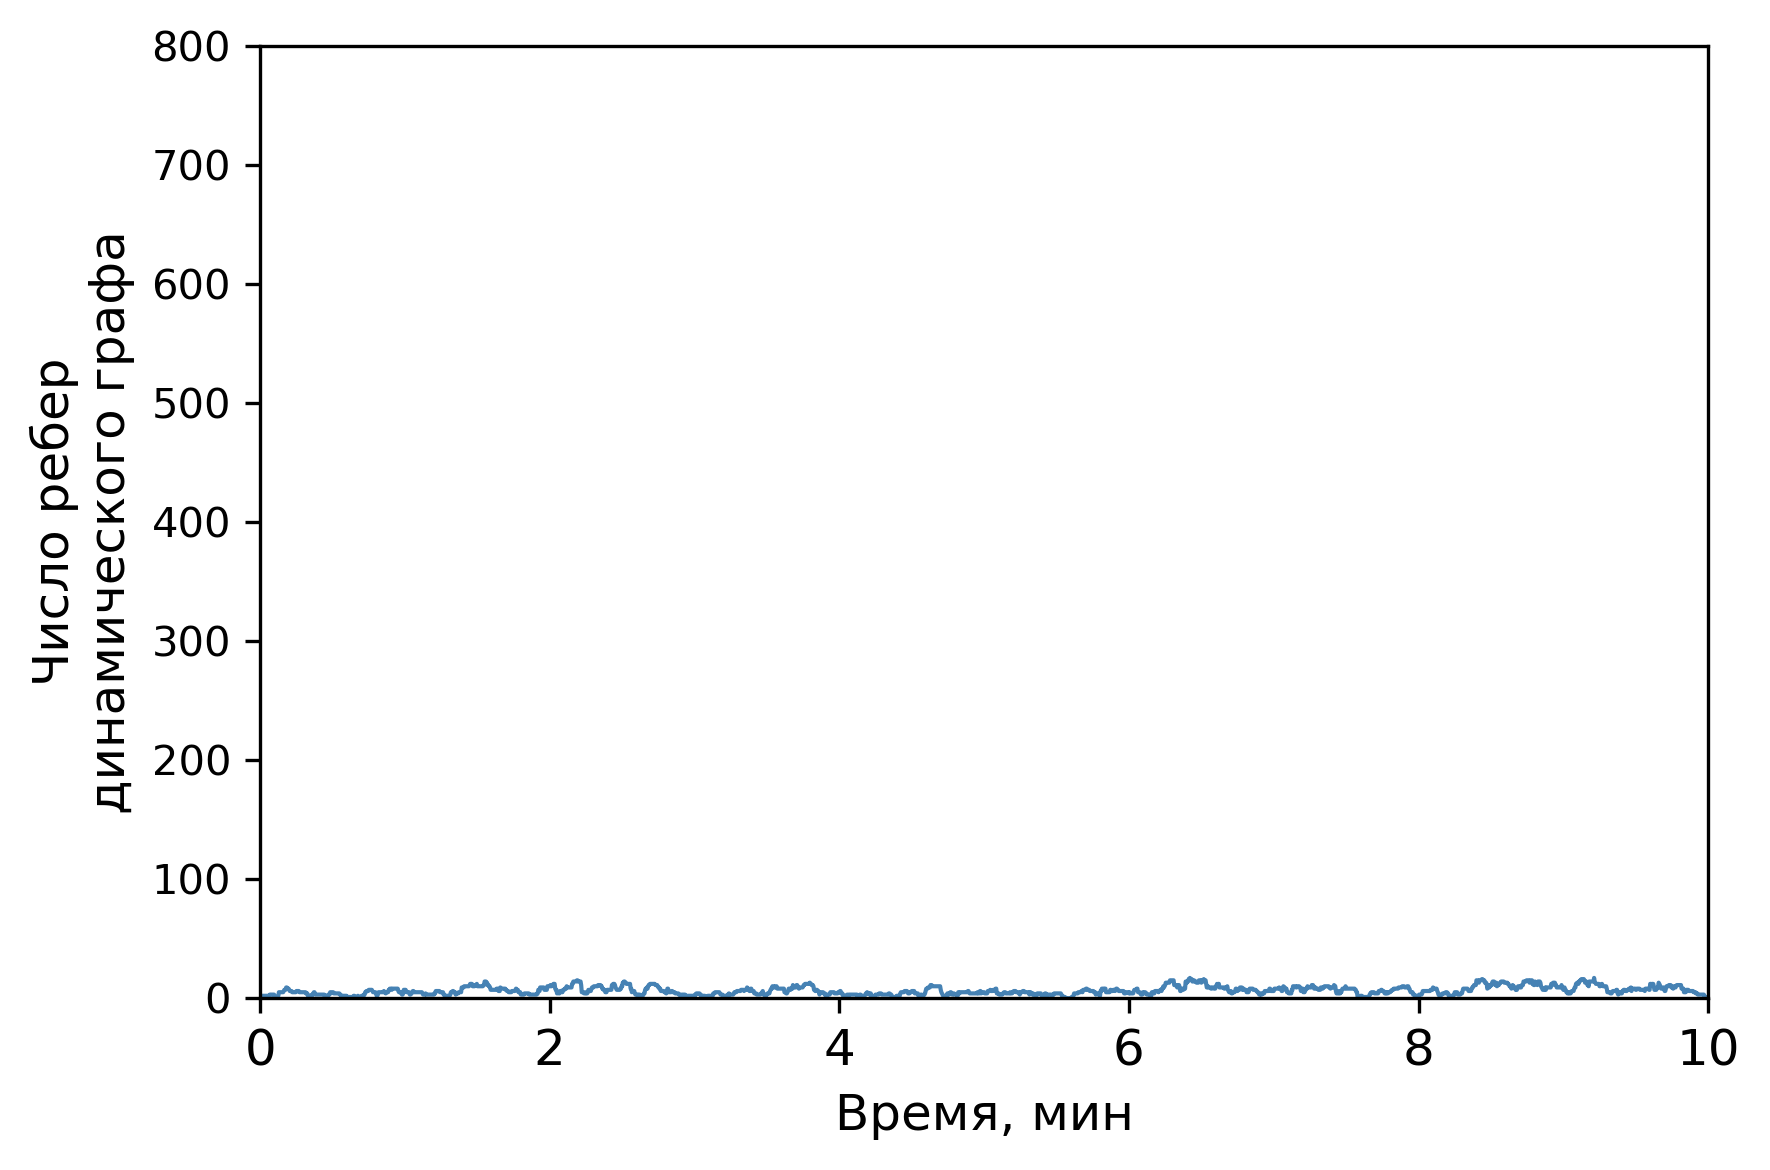

In [42]:
import scipy
import scipy.misc 
import scipy.io
import mat73
import matplotlib.ticker as ticker
from matplotlib.transforms import IdentityTransform

def import_hist_edges_old(path):
    data = mat73.loadmat(path)
    arr = data['hist_edges']
    lst_t = range(len(arr))
    lst_y = []
    for i in lst_t:
        lst_y.append(arr[i])
    return lst_t, lst_y

def import_hist_edges(path):
    data = mat73.loadmat(path)
    arr = data['history_edges']
    lst_t = range(len(arr))
    lst_y = []
    for i in lst_t:
        lst_y.append(arr[i])
    return lst_t, lst_y

f = 12 
x_borders = 30
y_borders = 40
width = (210 - x_borders)/25.4
height = width

def drawImage_old(path, y_name, filename):
    lst_t, lst_y = import_hist_edges_old(path)
    ticksx = [i for i in range(-2, 11, 2)]
    fig2, ax = plt.subplots(figsize = (6, 4), dpi = 300)  
    ax.plot(lst_t, lst_y, linewidth=1, color='steelblue')
    ax.set_ylabel(y_name, fontsize = f)
    ax.set_xlabel('Время, мин', fontsize = f)
    ax.set_xticklabels(ticksx, fontsize = f)
    ax.set_xlim([0, 1200])
    ax.set_ylim([0, 800])
    #ax.set_yscale('log')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(len(lst_y)/5))  
    plt.tight_layout()
    plt.savefig(filename)
    
def drawImage(path, y_name, filename):
    lst_t, lst_y = import_hist_edges(path)
    ticksx = [i for i in range(-2, 11, 2)]
    fig2, ax = plt.subplots(figsize = (6, 4), dpi = 300)  
    ax.plot(lst_t, lst_y, linewidth=1, color='steelblue')
    ax.set_ylabel(y_name, fontsize = f)
    ax.set_xlabel('Время, мин', fontsize = f)
    ax.set_xticklabels(ticksx, fontsize = f)
    ax.set_xlim([0, len(lst_y)])
    ax.set_ylim([0, 800])
    #ax.set_yscale('log')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(len(lst_y)/5))  
    plt.tight_layout()
    plt.savefig(filename)    

drawImage('data/history_edges_int6.mat', 'Число ребер\nдинамического графа', 'fig5a.png')
drawImage_old('data/hist_edges2_4.mat', 'Число ребер\nдинамического графа', 'fig5b.png')
drawImage('data/history_edges_C4_1.mat', 'Число ребер\nдинамического графа', 'fig5c.png')


# Fig 8  

3
[<matplotlib.patches.PathPatch object at 0x000002A93CA459D0>, <matplotlib.patches.PathPatch object at 0x000002A93CA6D0A0>, <matplotlib.patches.PathPatch object at 0x000002A93B0FFB50>]
Median quartile
 Int astro 255.0000 [53.2500; 666.5000]
 Int neuro 2128.0000 [819.2500; 3904.7500]
 Old astro 182.0000 [38.2500; 517.2500]
two-sample wilcoxon-test
 Int neuro: Int astro 0.000624
 Old astro: Int astro 0.792082
 Old astro: Int neuro 0.000298


C:\Users\Admin\AppData\Local\Temp/ipykernel_8380/2673482252.py:111: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(ylim_new[0], ylim_new[1])


3
[<matplotlib.patches.PathPatch object at 0x000002A93B16C520>, <matplotlib.patches.PathPatch object at 0x000002A93B1616A0>, <matplotlib.patches.PathPatch object at 0x000002A93B158DF0>]
Median quartile
 Int astro 30.5000 [6.0000; 38.0000]
 Int neuro 212.0000 [74.0000; 380.7500]
 Old astro 12.5000 [3.5000; 14.7500]
two-sample wilcoxon-test
 Int neuro: Int astro 0.001393
 Old astro: Int astro 0.149627
 Old astro: Int neuro 0.000025


C:\Users\Admin\AppData\Local\Temp/ipykernel_8380/2673482252.py:111: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(ylim_new[0], ylim_new[1])


3
[<matplotlib.patches.PathPatch object at 0x000002A93C5B8850>, <matplotlib.patches.PathPatch object at 0x000002A93C5C0670>, <matplotlib.patches.PathPatch object at 0x000002A93C5E6E50>]
Median quartile
 Int astro 0.5079 [0.1774; 1.8098]
 Int neuro 2.8629 [0.9647; 5.9988]
 Old astro 0.4882 [0.1175; 1.5831]
two-sample wilcoxon-test
 Int neuro: Int astro 0.023311
 Old astro: Int astro 0.747205
 Old astro: Int neuro 0.016103


C:\Users\Admin\AppData\Local\Temp/ipykernel_8380/2673482252.py:111: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(ylim_new[0], ylim_new[1])


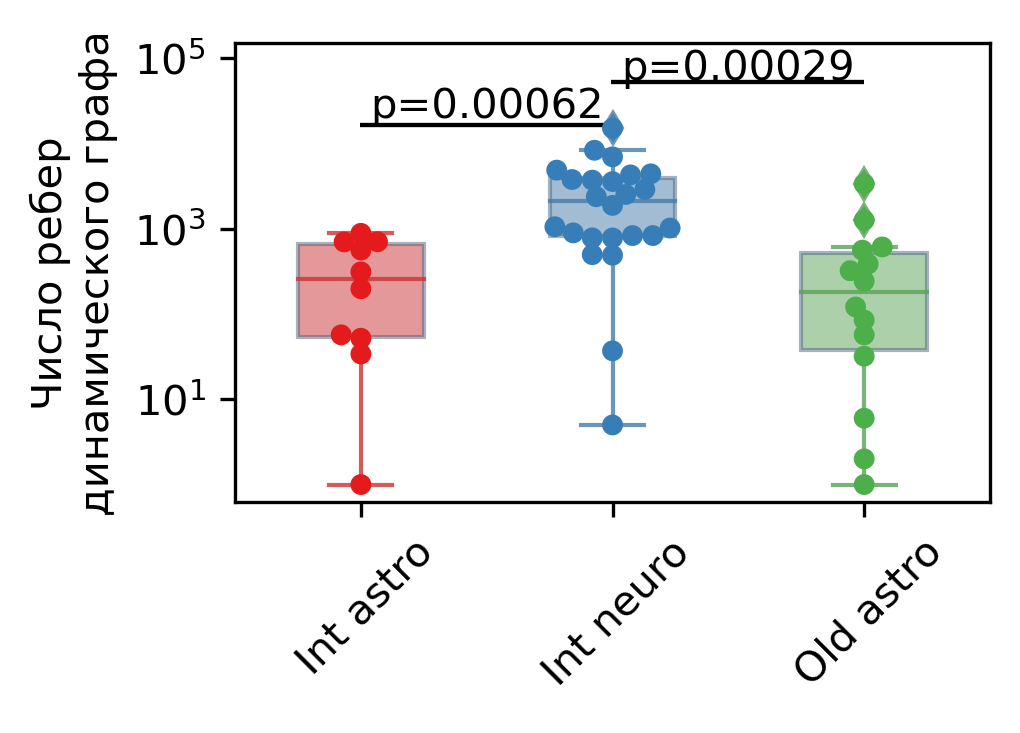

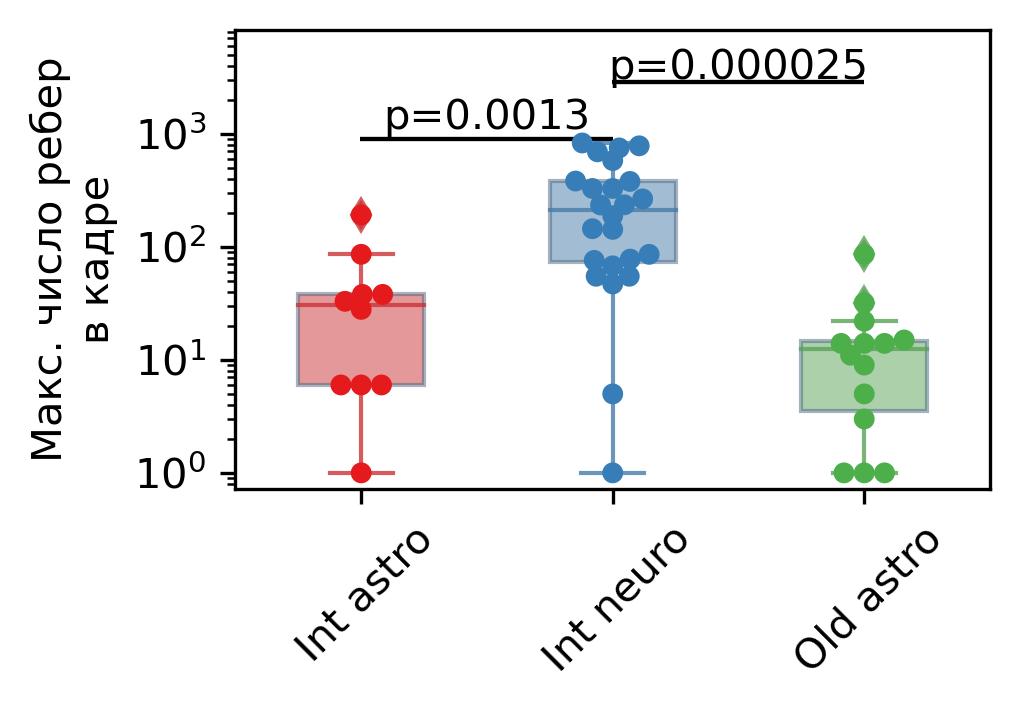

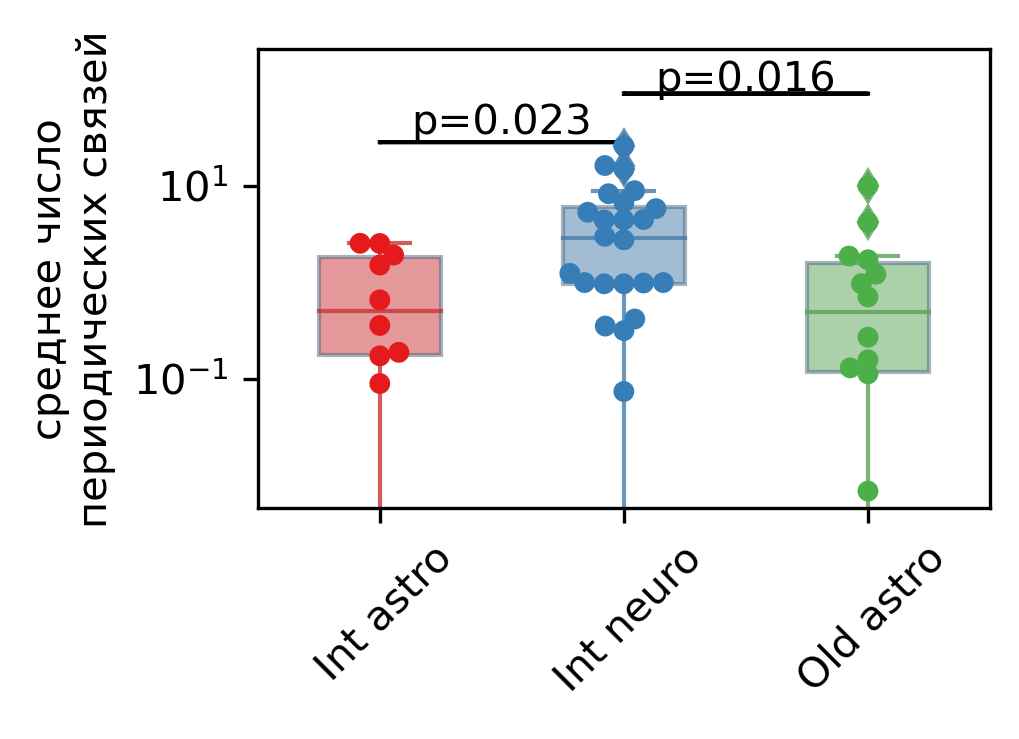

In [13]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu


def list_files(directory):
    lp=[]
    ln=[]
    for file in os.listdir(directory):    
        if file.endswith(".csv"):
            lp.append(directory + file)
            ss = file.replace('.csv','')
            ln.append(ss)
    return lp, ln


def median(data):
    data = sorted(data)
    i = 0
    a = 0
    b = 0
    if len(data) == 0:
        return 0
        
    if len(data) % 2 != 0:
            return data[len(data)//2]
    else:
        a = len(data)//2 - 1
        b = len(data)//2 
        i = (data[a]+data[b])/2
        return i

    
def sum_poelem(l1, l2):
    l = []
    for i in range(len(l1)):
        l.append (l1[i] + l2[i])
    return l


def csv_to_lists(fn):
    Group = []
    num_edge = []
    max_event = []
    avg_conn_period = []
    Group10_24 = []
    Group24_40 = []
    Group40pl = []
    GroupAll = []
    
    with open(fn, 'r') as f:
        header = f.readline()
        header = f.readline()
        NumCell = 1
        for line in f:
            s = line.replace(',','.') 
            #print(s)
            s1, a, z1, z2, z3, z4, z5, z6, z7, z8, z9, z10, z11, z12, z13, z14, z15, z16, z17, b, c, d, e, f, g = s.split(';') 
            Group.append(a)
            num_edge.append(int(z4))
            max_event.append(int(z8))
            avg_conn_period.append(float(z11))
            Group10_24.append(int(e))
            Group24_40.append(int(f))
            Group40pl.append(int(g))   
            GroupAll.append(int(z1))   
    return Group, num_edge, max_event, avg_conn_period


def Average(lst):
    return sum(lst) / len(lst)


def plot_feature_boxplot(feature_name, full_name, data, data_names,  
                         id_mean = False, ylim_new = [None, None], data_mult = 1, 
                         fig = None, ax = None, nolabel = False, verbose = 1, start_color = 0, 
                         y_scale = 'linear', marker_shift = 0.05):
    print(len(feature_name))
    if fig is None:
        if len(feature_name) > 2:
             plt.figure(figsize = (3.5, 2.5), dpi=300) # на 3
        if len(feature_name) == 2:        
             plt.figure(figsize = (3, 2), dpi=300) # на 2
    if ax is None:
        ax = plt.gca()
    df_data = pd.DataFrame()
    mean_value = 1
    first_data = []

    def rotate(l, n):
        return l[n:] + l[:n]

    sns.set_palette(rotate(sns.color_palette("Set1", 12), start_color))
    
    #data_names = ['14dgal','14atp','young','21dgal']
    dat = {'name':  data_names,
       'value': data,
       }
    plt.yscale(y_scale)
    bx = sns.boxplot(x = 'name', y = 'value', data = dat, width = 0.5, boxprops=dict(alpha=.5), ax = ax)
    sns.swarmplot(x = "name", y = "value", data = dat, ax = ax)
    plt.setp(bx.get_xticklabels(), rotation=45)

    from matplotlib.font_manager import FontProperties
    prop = FontProperties()
    prop.set_file('stixfonts/otf/STIX2Math.otf')
    ax.set_ylabel(full_name)
    ax.set_ylim(ylim_new[0], ylim_new[1])

    print(bx.artists)
    for i, box in enumerate(bx.artists):
        color = box.get_facecolor()
        color = list(color)
        color[3] = 0.8
        box.set_edgecolor([.3,.4,.5,.6])
        box.set_linewidth(1)
        for j in range(i*6,i*6+6):
            bx.lines[j].set_color(color)
            bx.lines[j].set_mec(color)
            bx.lines[j].set_mfc(color)
            bx.lines[j].set_linewidth(1)    
    


def feature_stat(data, data_names):
    from scipy import stats
    from scipy.stats import shapiro
    
    mean_value = 1
    first_data = []
    
    unique = []
    for a in data_names:
        if not a in unique:
            unique.append(a)
    
    ll = []
    for j in range(len(unique)):
        l = []
        for i in range(len(data_names)):   
            if data_names[i]==unique[j]:
                l.append(data[i])
        ll.append(l)
    
    print ("Median quartile")
    for j in range(len(unique)):
        cur_data = ll[j]
        cur_name = unique[j]
        #k2, p = stats.normaltest(cur_data)
        #stat, p = shapiro(cur_data)
        q1, q2, q3 = np.quantile(cur_data, [0.25, 0.5, 0.75])
        print(cur_name, "{:0.4f}".format(q2), '[' + "{:0.4f}".format(q1) + "; " + "{:0.4f}".format(q3) + ']')
        # дов инт 5%
        ci = 1.96 * np.std(cur_data)/np.sqrt(len(cur_data))
        #print('дов инт 5%: ' + str(ci))
    
    lfrom=[]
    lto=[]
    lval=[]
    print ("two-sample wilcoxon-test")
    for j in range(len(unique)):
         for i in range(len(unique)):
            if i<j:    
                u, p_value = mannwhitneyu(ll[j], ll[i])
                print (str(unique[j]) + ':' + str(unique[i]), toFixed(p_value,6))
                if p_value<0.05:
                    lfrom.append(j)
                    lto.append(i)
                    lval.append(p_value)
    return lfrom, lto, lval

def toFixed(numObj, digits=2):
    return f"{numObj:.{digits}f}"
   
# показать 2 первых не 0            
def normNumber(n):
    #s = str(n)
    s = '{:f}'.format(n)
    for i in range(2, len(s)-1):
        if s[i]!='0' and s[i]!='.':
            if s[i+1]=='0':
               s = s[:i+1]
            else: 
               s = s[:i+2] 
            break
    return s

def drawPVallines(plt, yst, lfrom, lto, lval, ystep = 5):
    for i in range(len(lfrom)):
        plt.arrow(lfrom[i], yst + i*ystep, lto[i] - lfrom[i], 0, color = 'k')
        xc = (lto[i]+lfrom[i])/2#-0.5
        #t = toFixed(lval[i],4)
        t = normNumber(lval[i])
        plt.annotate('p=' + t, [xc, yst + ystep/10 + i*ystep], ha = 'center', fontsize = 10, color = 'k')           
        
def selectGroups(group_names, df, l):
    ld = []
    lg = []
    for i in range(len(l)):
        for j in range(len(group_names)):
            if group_names[j]==l[i]:
               ld.append(df[j])
               lg.append(group_names[j])
    return ld, lg        
    

def NormGroups(GroupAll, Group16pl, Group2_4, Group4_10, Group10_24, Group24_40, Group40pl):
    for i in range(len(Group16pl)):
        Group16pl[i] = 100*Group16pl[i]/GroupAll[i]
        Group2_4[i] = 100*Group2_4[i]/GroupAll[i]
        Group4_10[i] = 100*Group4_10[i]/GroupAll[i]
        Group10_24[i] = 100*Group10_24[i]/GroupAll[i]
        Group24_40[i] = 100*Group24_40[i]/GroupAll[i]
        Group40pl[i] = 100*Group40pl[i]/GroupAll[i]
    return Group16pl, Group2_4, Group4_10, Group10_24, Group24_40, Group40pl


s = 'data/svtabl_astro_adj_my.csv'

Group, num_edge, max_event, avg_conn_period = csv_to_lists(s)

group_names = [
    ' Int astro',
    ' Int neuro',
    ' Old astro'   
]
group_names1 = [' Int astro', ' Int neuro', ' Old astro']


def drawImage(Group, group_names1, full_group, filename, num_lines = 5.5, y_scale = 'linear',
              y_name = 'Число ребер\nдинамического графа'):
    group_selected, Group1 = selectGroups(Group, full_group, group_names1)
    max_group = max(group_selected)
    if y_scale == 'linear':
        ymax = max_group*2
        y_step = max_group/num_lines
    else:
        ymax = max_group*10  
        y_step = 13*max_group/num_lines
    plot_feature_boxplot(group_names1, y_name, group_selected, Group1, y_scale = y_scale, ylim_new = [0, ymax])
    lfrom, lto, lval = feature_stat(group_selected, Group1)
    drawPVallines(plt, max_group+0.5*max_group/num_lines, lfrom, lto, lval, ystep = y_step)
    plt.tight_layout()
    plt.savefig(filename)

drawImage(Group, group_names1, num_edge, 'fig6a.png', y_scale = 'log', y_name = 'Число ребер\nдинамического графа')
drawImage(Group, group_names1, max_event, 'fig6b.png', y_scale = 'log', y_name = 'Макс. число ребер\nв кадре')
drawImage(Group, group_names1, avg_conn_period, 'fig6c.png', y_scale = 'log', y_name = 'cреднее число\nпериодических связей')



